# Supervised Learning Capstone Project part2- Tree Methods Focus 



In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Display the balance of the class labels (Churn) with a Count Plot.

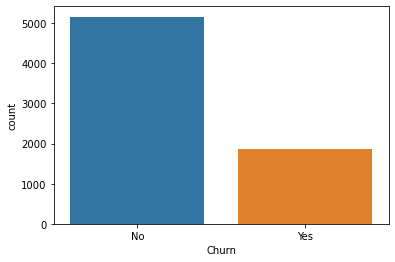

In [7]:
sns.countplot(data=df, x='Churn');

#### Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.

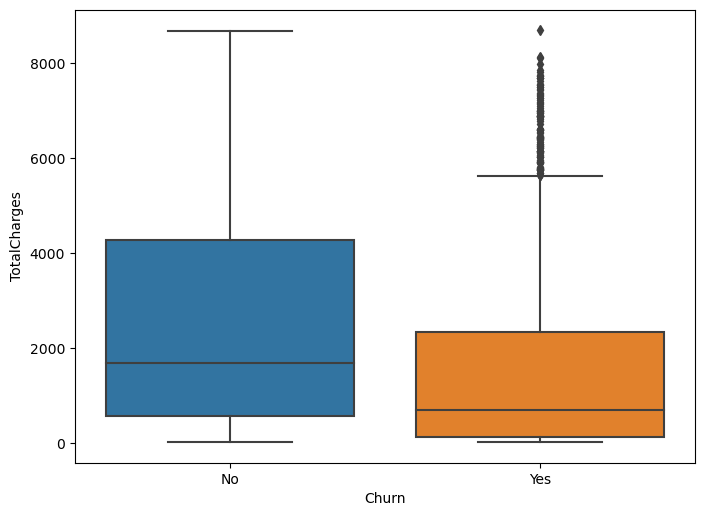

In [9]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df, x='Churn', y='TotalCharges');

#### Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.

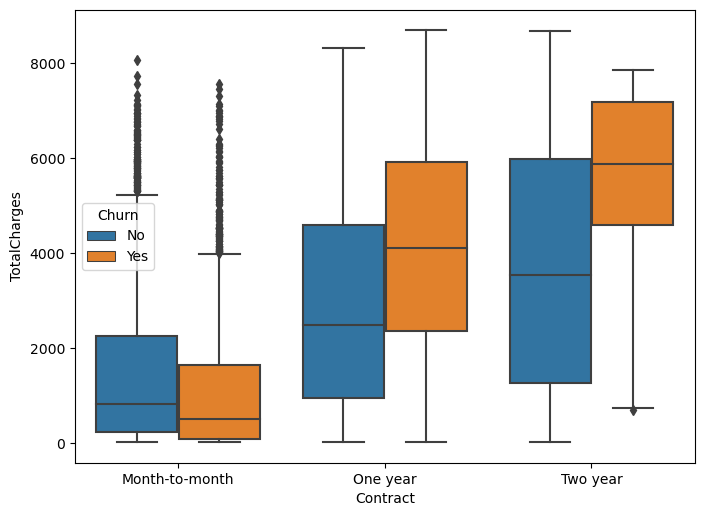

In [11]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df, x='Contract', y='TotalCharges',hue='Churn');

#### Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features. 

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, I've specifically listed only the features above, we should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.drop('customerID',axis=1, inplace=True)

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [22]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [27]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
corr_yes_churn

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

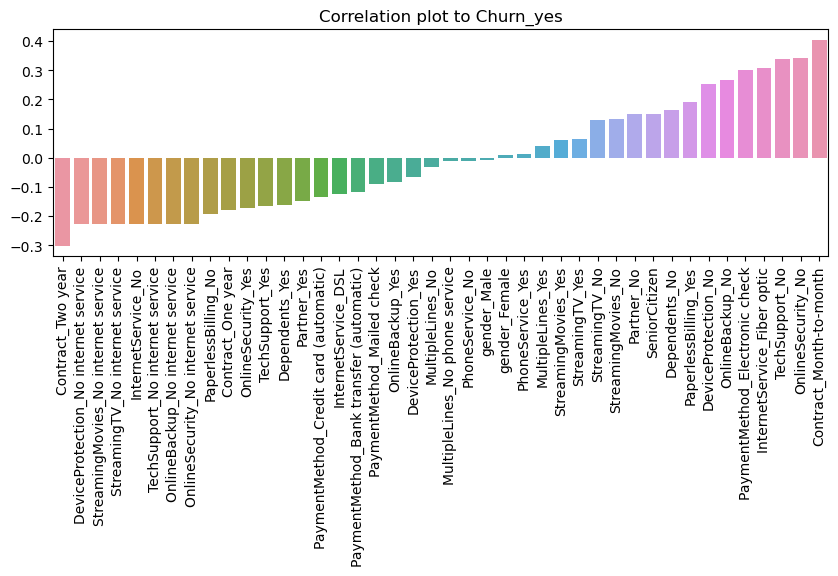

In [34]:
plt.figure(figsize=(10,3),dpi=100)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title('Correlation plot to Churn_yes')
plt.xticks(rotation=90);

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

#### What are the 3 contract types available?

In [37]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [38]:
df['tenure'].unique() #tenure/time people had the service in months

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

#### Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.

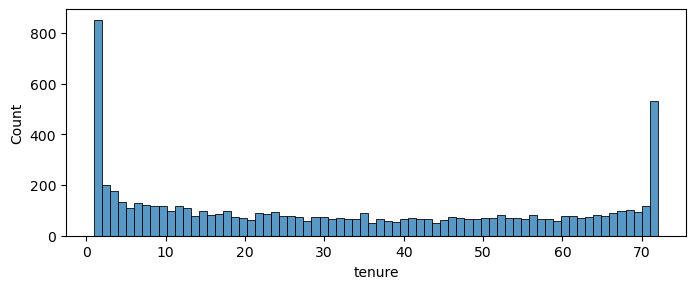

In [41]:
plt.figure(figsize=(8,3), dpi=100)
sns.histplot(df,x='tenure', bins=70);

#### Create histograms separated by two additional features, Churn and Contract. ( I took the help of seaborn documentation as a guide)

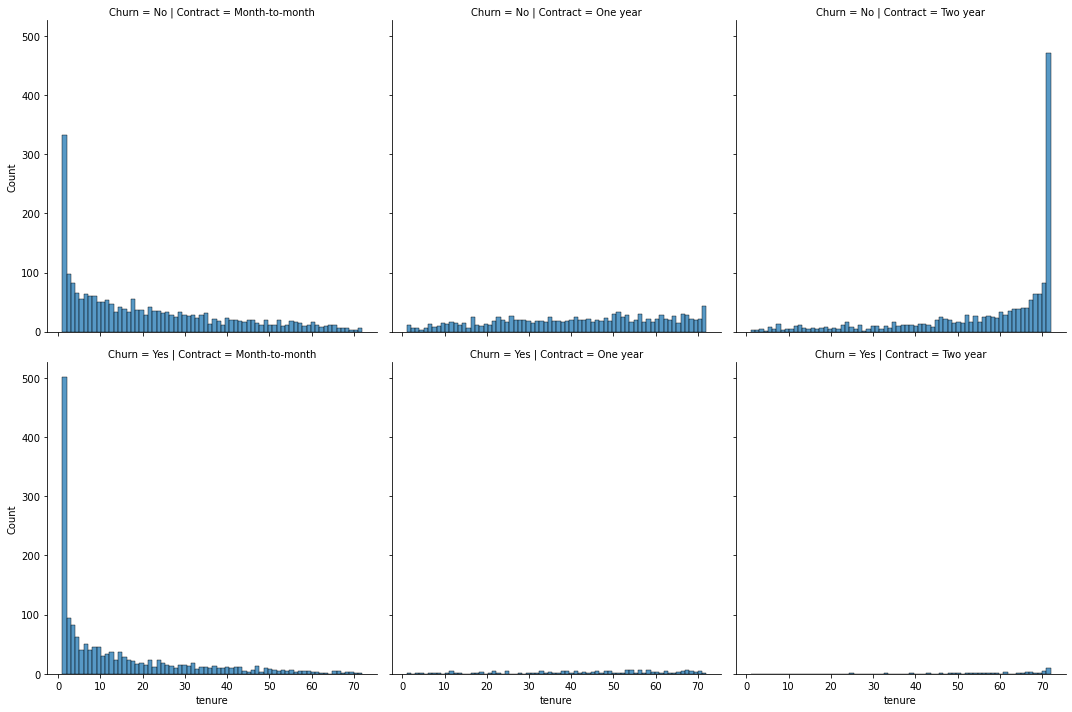

In [44]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn');

## Insights from above plot:
1. We dont have to worry about the customers that have a 1 or 2 year contract as they are ones who are eiher in need of this service and won't Churn.
2. Customers who have Moth-to-month contract are Churning more, maybe because they only need the service for a month. Also on the other side the people churning in Month-to-Month contract are not satisfied by the service, causing them to churn, so moree docus should be made on how to make these people stay.

### But
3. Again what about the people who have 10,20,30 month contract, why do they take month to month contract instead of yearly contracts, because 10,20,30 months is a really long tenure. We previously saw that people tend to churn based off their total charges and monthly charges. So maybe they're going to charge more on a month to month, even though they intend to keep it for a longer tenure. So what we could think about are promotions that basically say, hey, I noticed your on this plan formore than 12 months, How about you sign for a one year contract?And that way you can lower your overall bill, but we keep the customer for longer in their lifetime span.

#### Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.

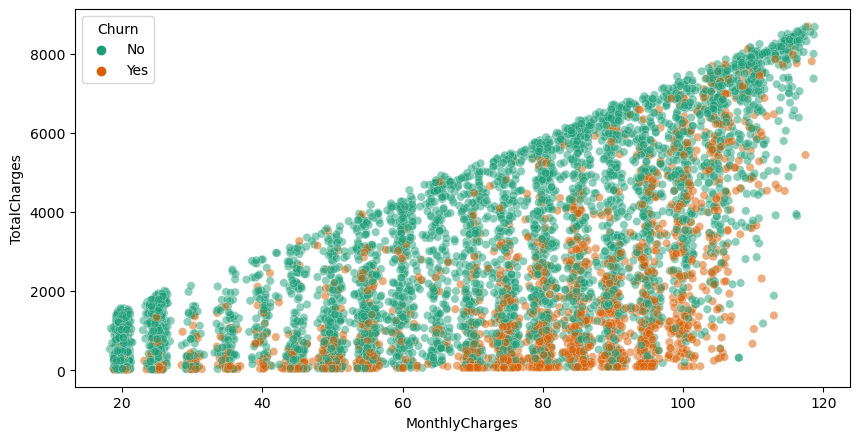

In [59]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn', alpha=0.5, linewidth=0.3, palette='Dark2');

## Insights from above plot:-
1. We can see that customers who have a large monthly bill tend to Churn more,that makes sense because if you're going or if you're having to pay more and more per month, you're probably going to try to figure out a better service or something that's cheaper for you. So you're going to end up turning.

2. Also we can see that some people are paying alot per month, but the total charges are very low vs the same people as seen from top corner of the plot are paying the exact same monthly charges but are able to extract more out of them in total charges and don't churn.

From a company perspective, what they really care is being able to extraxt more from the customer in total charges, rather than focussing on monthly charges, essentially saying that:- 

The company would rather have one customer paying 10 dollars per month, rather than the one paying 100 dollars for the whole year at once and then leaving in a month, because in the first case you have 120 dollars more in total charges than the second one.

### So what is causing these people to churn?
From the plots we have seen so far, if you're to charged a lot per month, you're very likely to churn, especially if you're on a month to month contract and you're only needing a service for a few months, maybe as the charges are too much on a monthly basis so you get fed up and Churn.

## Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

#### Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.

In [64]:
df.groupby(['Churn','tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[18 rows x 144 columns]

In [66]:
# Grouping only people who churned
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
DeviceProtection,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [71]:
# Grouping by people who did not churn
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
DeviceProtection,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [72]:
# Calculating the % of Churn rate = yes_churn/(yes_churn + no_churn)

In [92]:
churn_rates = 100 * yes_churn / (yes_churn + no_churn)
churn_rates

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
DeviceProtection,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [93]:
churn_rates = churn_rates.iloc[1]

In [98]:
churn_rates

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: SeniorCitizen, Length: 72, dtype: float64

So above we can see the churn rate i.e. percent of people churning in percent for each month contract, people with 1 month contract have 61.99% of Churning rate and so on.

#### Now that we have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.

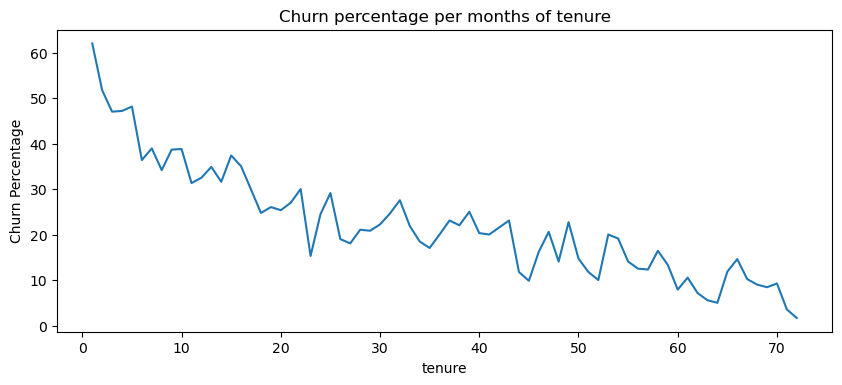

In [105]:
plt.figure(figsize=(10,4),dpi=100)
sns.lineplot(x=churn_rates.index, y=churn_rates.values)
plt.title('Churn percentage per months of tenure')
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
#### Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:-
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [106]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [107]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49: 
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [108]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [109]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [110]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


#### Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.

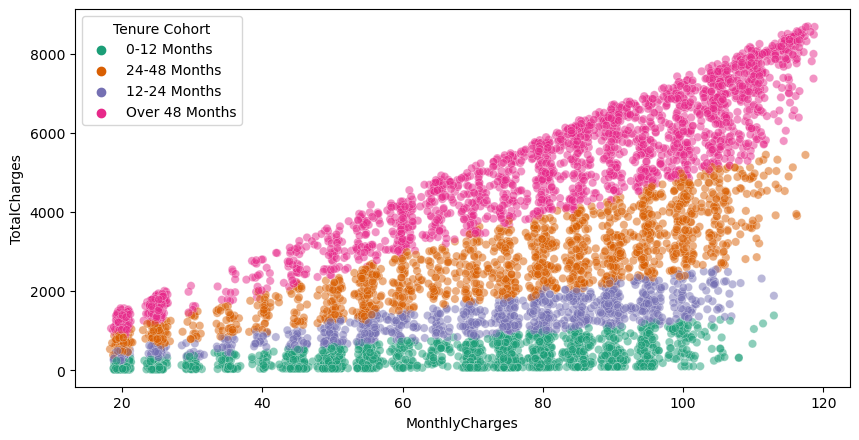

In [111]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', alpha=0.5, linewidth=0.3, palette='Dark2');

So the above plot shows that TotalCharges from people who have monthly contracts or in 1 year contract is not that much compared to people have bigger contracts,, which is obvious because the longer the contract is the more TotalCharges the have.

#### Create a count plot showing the churn count per cohort.

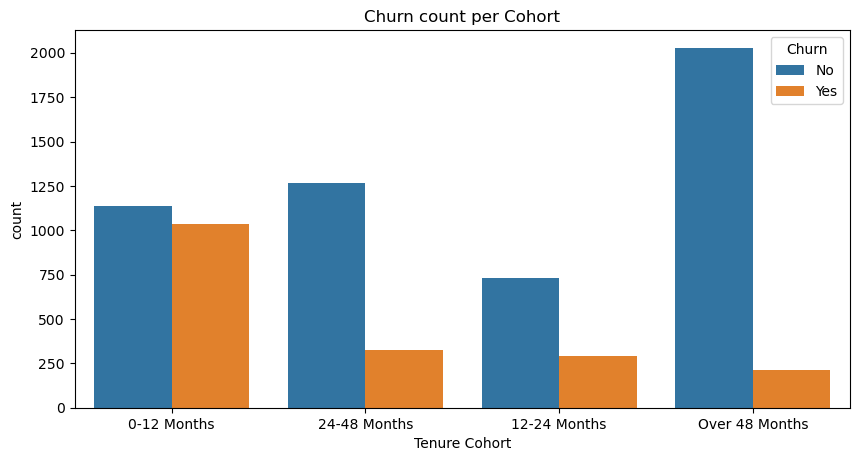

In [115]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df,x='Tenure Cohort', hue='Churn')
plt.title('Churn count per Cohort');

This plot also essentially shows us that people who have contracts at about more than 48 months are less likely Churn vs people who are on the service for oly about 12 months.

#### Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

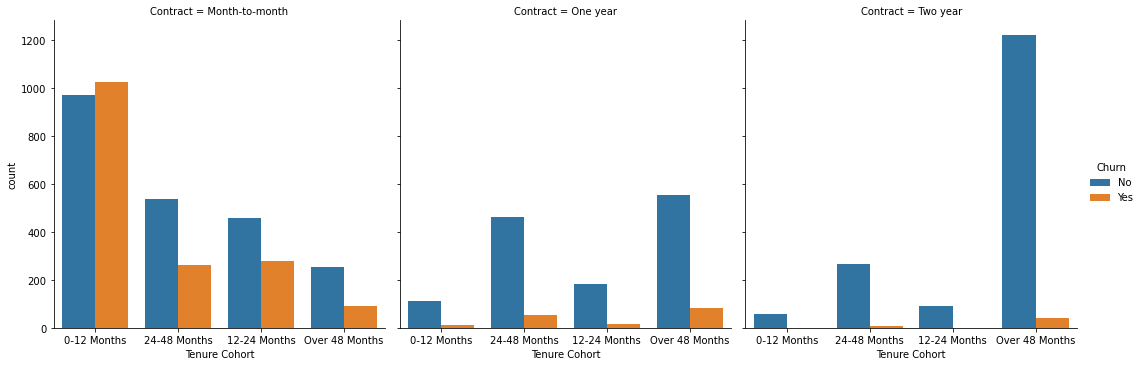

In [116]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count',
           col='Contract');

So again, people that sign up for one year or two year contracts, regardless of how long they stay on the service, they're actually less likely to churn is kind of interesting.

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. 


## 1.Single Decision Tree

In [119]:
X = df.drop('Churn',axis=1)
X = pd.get_dummies(X, drop_first=True)

In [120]:
y = df['Churn']

In [121]:
# Splitting the data
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=101 )

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
decisiontree_model = DecisionTreeClassifier()

In [139]:
from sklearn.model_selection import GridSearchCV

In [150]:
parameter_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,21)), 'min_samples_split': [2, 3, 4]}

In [151]:
decisiontree_grid_model = GridSearchCV(estimator=decisiontree_model, param_grid=parameter_grid)

In [178]:
decisiontree_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_split': [2, 3, 4]})

In [179]:
decisiontree_grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

#### Above we can see the best hyperparameters the model got after gridsearch

In [180]:
# Predictions
dtree_pred = decisiontree_grid_model.predict(X_test)

In [181]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [320]:
dt_acc = accuracy_score(y_test, dtree_pred)*100
print('The Accuracy of Decision Tree Model is:- ', dt_acc,'%')

The Accuracy of Decision Tree Model is:-  79.53091684434968 %


In [183]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1052
         Yes       0.62      0.50      0.55       355

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



So from the report we can see that the model is performing quiet well on the Churn_No data points.

So this does make sense because originally in the countplot of classes by Churn we saw that we had more data from Churn_No data and less from Churn_Yes. So this performance is kinda expected because of the class imbalance, where the model had enough data from the Churn_No class to learn from and less from the Churn_Yes class.

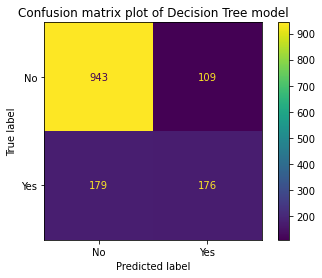

In [220]:
plot_confusion_matrix(decisiontree_grid_model, X_test, y_test)
plt.title('Confusion matrix plot of Decision Tree model');

In [187]:
decisiontree_grid_model.best_estimator_.feature_importances_

array([0.        , 0.48381516, 0.01626416, 0.03064115, 0.        ,
       0.        , 0.        , 0.        , 0.00826866, 0.        ,
       0.36400115, 0.        , 0.        , 0.        , 0.02577253,
       0.        , 0.01671016, 0.        , 0.        , 0.00585495,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02477904, 0.        , 0.        , 0.02389304, 0.        ,
       0.        , 0.        , 0.        ])

In [188]:
dtree_imp_feats = pd.DataFrame({'Feature':X.columns,'Feature Importance':decisiontree_grid_model.best_estimator_.feature_importances_})

In [192]:
dtree_imp_feats_sorted = dtree_imp_feats.sort_values(by='Feature Importance')
dtree_imp_feats_sorted

,Feature,Feature Importance
0,SeniorCitizen,0.000000
30,Tenure Cohort_12-24 Months,0.000000
29,PaymentMethod_Mailed check,0.000000
27,PaymentMethod_Credit card (automatic),0.000000
26,PaperlessBilling_Yes,0.000000
24,Contract_One year,0.000000
23,StreamingMovies_Yes,0.000000
22,StreamingMovies_No internet service,0.000000
21,StreamingTV_Yes,0.000000
20,StreamingTV_No internet service,0.000000


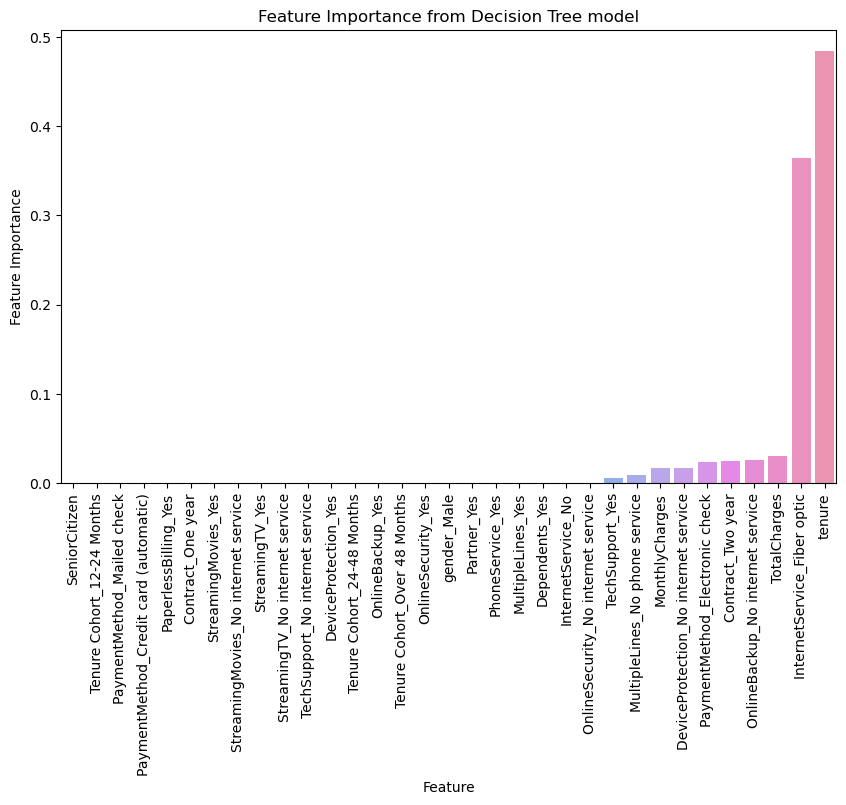

In [195]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=dtree_imp_feats_sorted, x='Feature', y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance from Decision Tree model');

In [196]:
from sklearn.tree import plot_tree

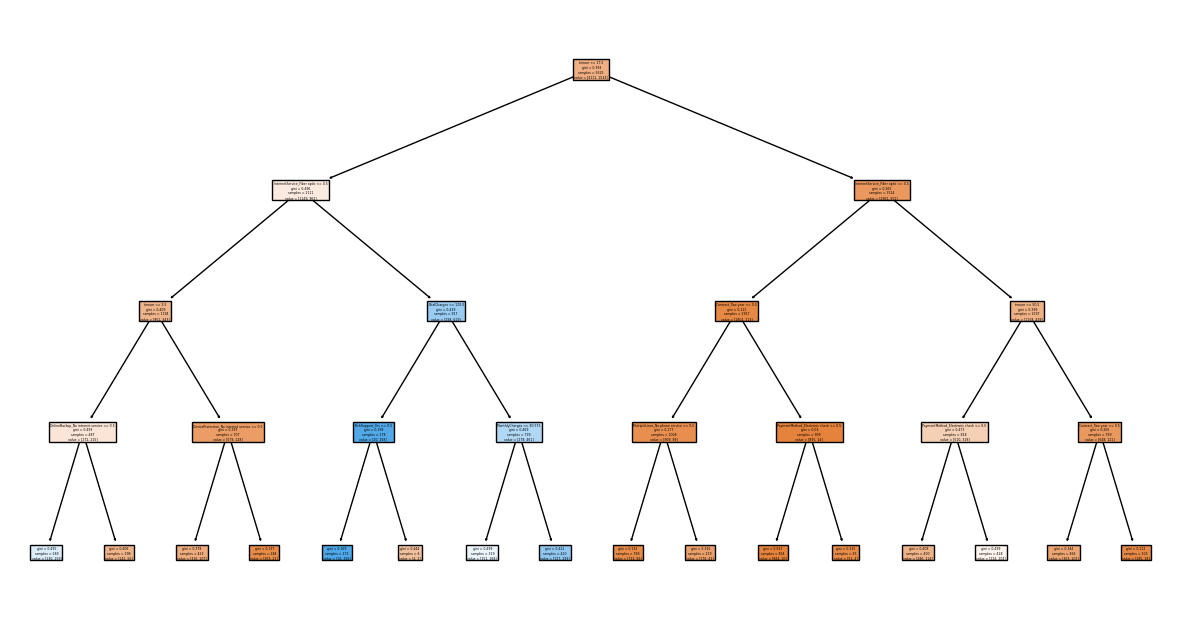

In [205]:
plt.figure(figsize=(15,8), dpi=100)
plot_tree(decisiontree_grid_model.best_estimator_, feature_names=X.columns,filled=True);

## 2.Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
random_forest_model = RandomForestClassifier()

In [260]:
#parameter grid
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
max_depth = [4,6]

In [261]:
parameter_grid_rf = {'n_estimators':n_estimators, 'max_features':max_features, 
                  'bootstrap':bootstrap, 'oob_score':oob_score,'max_depth':max_depth}

In [262]:
rf_grid_model = GridSearchCV(estimator=random_forest_model, param_grid=parameter_grid_rf)

In [263]:
rf_grid_model.fit(X_train, y_train)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Karthi

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6],
                         'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [264]:
# Best hyperparameters chosen by the model
rf_grid_model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 64,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [265]:
# Predictions
rf_preds = rf_grid_model.predict(X_test)

In [319]:
# Evaluation
rf_acc = accuracy_score(y_test, rf_preds)*100
print('The Accuracy of Random Forest Model is:- ', rf_acc,'%')

The Accuracy of Random Forest Model is:-  80.45486851457001 %


In [267]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1052
         Yes       0.66      0.46      0.54       355

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



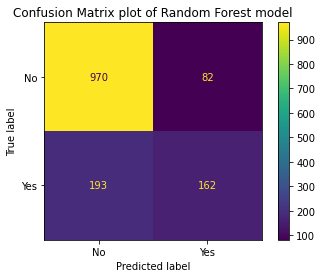

In [268]:
plot_confusion_matrix(rf_grid_model,X_test,y_test)
plt.title('Confusion Matrix plot of Random Forest model');

## Boosted Trees

### 1. AdaBoost

In [224]:
from sklearn.ensemble import AdaBoostClassifier

In [278]:
adab_model = AdaBoostClassifier(n_estimators=100)

In [279]:
adab_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

**TASK: Analyze your results, which model performed best for you?**

In [280]:
adab_preds = adab_model.predict(X_test)

In [318]:
ad_acc = accuracy_score(y_test, adab_preds)*100
print('The Accuracy of Ada Boost Model is:- ', ad_acc,'%')

The Accuracy of Ada Boost Model is:-  80.95238095238095 %


In [282]:
adab_model.base_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [283]:
print(classification_report(y_test,adab_preds))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1052
         Yes       0.64      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



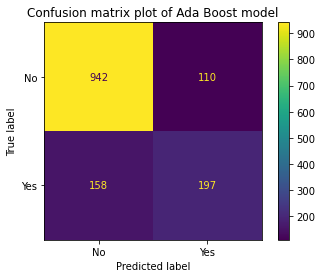

In [314]:
plot_confusion_matrix(adab_model, X_test, y_test)
plt.title('Confusion matrix plot of Ada Boost model');

In [301]:
accuracy_score(y_test, rf_preds)#*100

0.8045486851457001

### 2.Gradient Boost

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [289]:
gb_model = GradientBoostingClassifier()

In [321]:
# paramter grid for gridsearchcv
param_grid_gb = {'n_estimators':[50,100], 'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [322]:
gb_grid_model = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb)

In [323]:
gb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [326]:
# Prediction
gb_preds = gb_grid_model.predict(X_test)

In [327]:
# Evaluation
gb_acc = accuracy_score(y_test, gb_preds)*100
print('The Accuracy of Gradient Boost Model is:- ', gb_acc,'%')

The Accuracy of Gradient Boost Model is:-  81.02345415778251 %


In [328]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



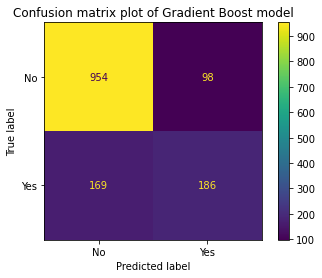

In [329]:
plot_confusion_matrix(gb_grid_model, X_test, y_test)
plt.title('Confusion matrix plot of Gradient Boost model');

### Conclusion

In [333]:
# Creating dataframe of accuracy of all the models
#model_accuracies = {'Logistic Regression': 81.16, 'KNN': 79.24, 'SVM': 81.09, "Decision Tree": 79.53, 'Random Forest': 80.45, 'Ada Boost': 80.95, 'Gradient Boost': 81.02}
model_accuracies = {'Model':['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Ada Boost','Gradient Boost'], 'Acuuracy':[81.16,79.24,81.09,79.53,80.45,80.95,81.02]}

In [340]:
model_acc = pd.DataFrame.from_dict(model_accuracies)
model_acc.sort_values(by='Acuuracy', ascending=False)

,Model,Acuuracy
0,Logistic Regression,81.16
2,SVM,81.09
6,Gradient Boost,81.02
5,Ada Boost,80.95
4,Random Forest,80.45
3,Decision Tree,79.53
1,KNN,79.24


## Prediction key points & improvements:-
1. So after performing all the algorithms, we can see that they all are performing around the same accuracy, but we still Logistic Regression, SVM and Gradient Boost algorithms to be the best performing algorithms.

2. Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores as a future improvement to get the model with the best score on jointly precision and recall.

3. Given the scores of the best performing models, it can be observed that F1 scores are not much above 50%. Further optimization efforts can be carried out to achieve higher scores and thereby increase prediction power for more business value.

### Hypothesis Check:-
Looking at the evaluation results, specifically the feature weights from the logistic regression, the hypothesis can be directionally supported or refused:
1. The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort→ Supported.
2. Contract duration: Contract duration month-to-month is the second biggest driver of churn → supported
3. Number of additional services: This feature does not rank among the top features → refused
4. Partners and children: Having children feature drives not churning, but strength is relatively low → partially supported
5. Tenure: High tenure ranks as the second strongest factor for not churning. This is also supported by the boxplot in the EDA step. → supported
6. Monthly payment: Total payments, which is the product of tenure and monthly payment ranks as the strongest factor for churn. Indirectly, high monthly payments lead to churn. However, tenure is the highest driver of not churning → refused
7. Senior citizens: Senior citizens does not have high feature weights. Also the ratio of senior citizens who churn is lower than that of non-churners → refused